In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
aff_df = pd.read_csv("aff_table.txt", comment="#", sep="\t", header=None)#таблица аффинности гексамеров
sort_aff_df = aff_df.sort_values(0)
sort_aff_df.columns = ['hexamer', 'affinity']
#print(len(df))#есть все гексамеры
sort_aff_df.head(20)
aff_hexa_list = []
for x in sort_aff_df['hexamer']:#какие гексамеры имеют ненулевую аффинность
    aff_hexa_list.append(x)

aff_numb_list = []
for x in sort_aff_df['affinity']:#упорядоченный список аффинности, чтобы потом вставить в df
    aff_numb_list.append(float(x))
print(type(aff_numb_list[1]))

hexa_df = pd.read_csv("hexa_all.txt", comment="#", sep=' ', header=None)#файл со средними покртыиями для всех гексамеров
sort_df = hexa_df.sort_values(0)
sort_df.columns = ['hexamer', 'cover']
hexa_ind_list = []
for x in sort_df['hexamer']:
    hexa_ind_list.append(x in aff_hexa_list)

df = sort_df[hexa_ind_list] #логическая индексация по встречаемости гексамера в таблице аффинности
df['affinity'] = aff_numb_list
print(df)


<class 'float'>
     hexamer     cover  affinity
3549  AAAGGA  5.631655      -1.9
560   AAAGGC  6.804094      -0.4
855   AAAGGG  6.721296      -1.4
2541  AAAGGT  6.732207      -0.6
2360  AAGAGA  5.451500      -0.1
3430  AAGAGG  5.855247      -2.4
1536  AAGGAA  5.958387      -2.7
3102  AAGGAC  5.390352      -2.4
3570  AAGGAG  5.573133      -4.6
3593  AAGGAT  5.330677      -2.5
1414  AAGGCA  6.748491      -0.3
1313  AAGGCC  5.026301      -0.3
561   AAGGCG  6.310990      -0.3
973   AAGGCT  5.674984      -0.3
856   AAGGGA  5.821919      -1.8
812   AAGGGC  6.454242      -1.5
3028  AAGGGG  5.653156      -3.7
3601  AAGGGT  5.826725      -1.6
2869  AAGGTA  6.366871      -1.1
3569  AAGGTC  5.232097      -0.5
2542  AAGGTG  6.262726      -1.1
1298  AAGGTT  6.007750      -0.5
3218  AATGGA  4.795339      -0.5
2090  ACAGGA  5.883252      -0.7
3482  ACAGGG  6.707560      -0.2
33    ACAGGT  5.767711      -0.2
3423  ACGAGA  5.789684      -0.2
2173  ACGAGG  5.882211      -2.5
987   ACGGAA  6.510552     

C:\Users\Ekaterina\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


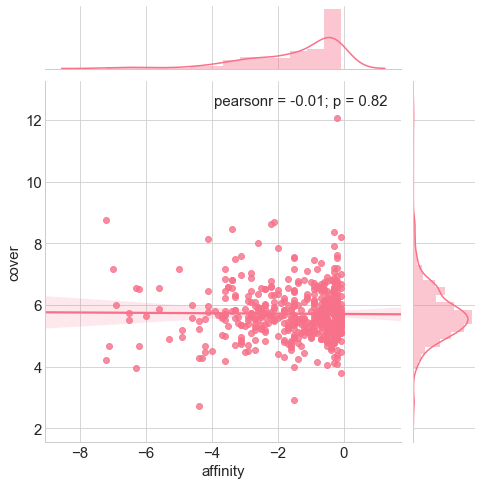

In [3]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("husl")
width, height = 10, 6
mpl.rcParams['figure.figsize'] = [width, height]
mpl.rcParams.update({'font.size': 15})
sns.jointplot("affinity", "cover", size=7, data=df, kind="reg") 